# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
     #print(city_url) #to debug - see if theres data
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | praia da vitoria
Processing Record 3 of Set 1 | mahajanga
Processing Record 4 of Set 1 | nelson
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | upington
Processing Record 7 of Set 1 | gamba
Processing Record 8 of Set 1 | nova vicosa
Processing Record 9 of Set 1 | mhamid
Processing Record 10 of Set 1 | flekkefjord
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | fort bragg
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | st. 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [44]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-1.34,91,19,1.49,CL,1715036485
1,praia da vitoria,38.7333,-27.0667,19.14,94,75,12.65,PT,1715036485
2,mahajanga,-15.7167,46.3167,26.01,61,20,6.17,MG,1715036486
3,nelson,-41.2833,173.2833,10.72,70,8,0.70,NZ,1715036486
4,grytviken,-54.2811,-36.5092,0.60,83,69,4.34,GS,1715036486
...,...,...,...,...,...,...,...,...,...
591,sisimiut,66.9395,-53.6735,-5.24,80,78,3.07,GL,1715036699
592,belmonte,-15.8631,-38.8828,25.31,84,0,3.27,BR,1715036699
593,machiques,10.0644,-72.5450,29.57,72,100,2.18,VE,1715036700
594,ramapuram,13.1167,79.2000,26.90,63,80,4.37,IN,1715036700


In [45]:
#Date format

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"] , unit = "s")

city_data_df["Date"] = city_data_df["Date"].dt.strftime('%Y-%m-%d')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-1.34,91,19,1.49,CL,2024-05-06
1,praia da vitoria,38.7333,-27.0667,19.14,94,75,12.65,PT,2024-05-06
2,mahajanga,-15.7167,46.3167,26.01,61,20,6.17,MG,2024-05-06
3,nelson,-41.2833,173.2833,10.72,70,8,0.70,NZ,2024-05-06
4,grytviken,-54.2811,-36.5092,0.60,83,69,4.34,GS,2024-05-06


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-1.34,91,19,1.49,CL,2024-05-06
1,praia da vitoria,38.7333,-27.0667,19.14,94,75,12.65,PT,2024-05-06
2,mahajanga,-15.7167,46.3167,26.01,61,20,6.17,MG,2024-05-06
3,nelson,-41.2833,173.2833,10.72,70,8,0.70,NZ,2024-05-06
4,grytviken,-54.2811,-36.5092,0.60,83,69,4.34,GS,2024-05-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

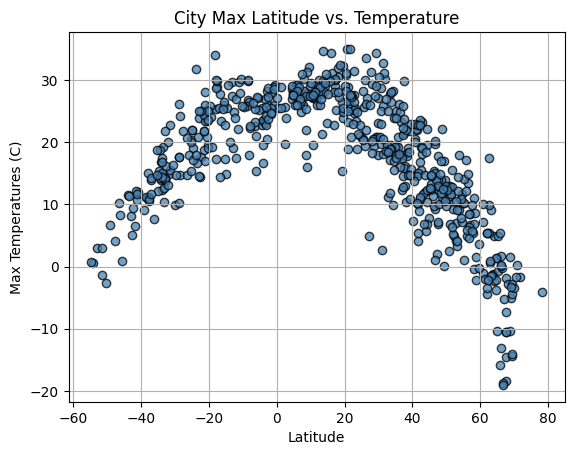

In [52]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

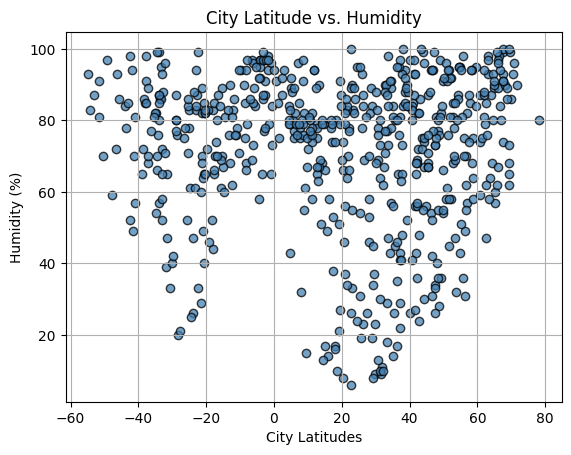

In [53]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

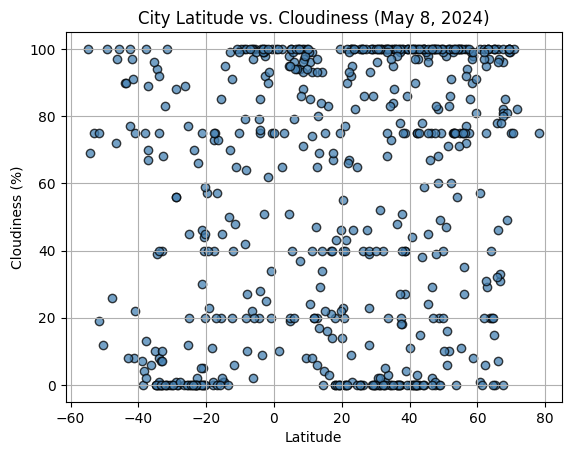

In [54]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (May 8, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

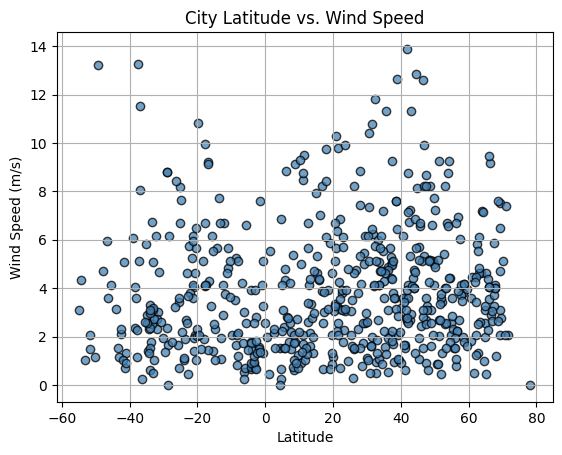

In [55]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lr_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    
    
    line_eq = ' y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2)) #format on how equation writtten
    
    plt.scatter(x_value, y_value, marker='o') #, edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3) #plot line
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red") #is the equation text
    plt.grid(True)
    print(f"The r-value is: {rvalue}")


In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,praia da vitoria,38.7333,-27.0667,19.14,94,75,12.65,PT,2024-05-06
8,mhamid,29.8200,-5.7200,27.10,9,0,2.99,MA,2024-05-06
9,flekkefjord,58.2971,6.6607,11.08,68,90,3.79,NO,2024-05-06
12,fort bragg,35.1390,-79.0060,25.08,84,100,3.60,US,2024-05-06
13,klyuchi,52.2667,79.1667,4.96,58,60,3.42,RU,2024-05-06


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-1.34,91,19,1.49,CL,2024-05-06
2,mahajanga,-15.7167,46.3167,26.01,61,20,6.17,MG,2024-05-06
3,nelson,-41.2833,173.2833,10.72,70,8,0.70,NZ,2024-05-06
4,grytviken,-54.2811,-36.5092,0.60,83,69,4.34,GS,2024-05-06
5,upington,-28.4478,21.2561,24.21,20,0,6.17,ZA,2024-05-06


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8585632205940357


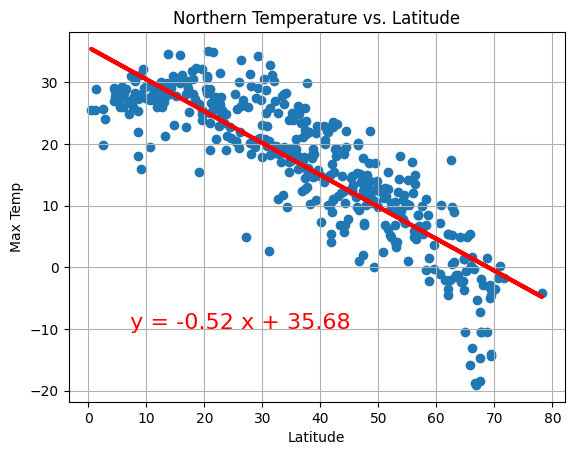

In [59]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']


lr_plot(x_value , y_value , "Max Temp" , (6,-10))
plt.title("Northern Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.8181530572055576


Text(0.5, 1.0, 'Southern Temperature vs. Latitude')

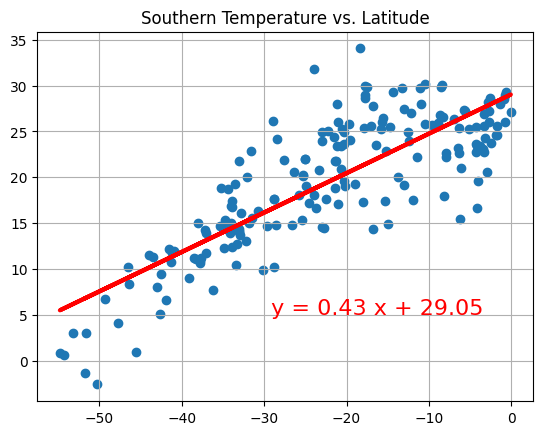

In [61]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']

lr_plot(x_value , y_value , "Max Temp" , (-30,5))

plt.title("Southern Temperature vs. Latitude")
#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE
The analysis of both charts reveals a compelling correlation between latitude and temperature. As we approach the equator (0° latitude), there's a noticeable uptick in temperature, indicating a direct relationship. This observation strongly aligns with the hypothesis asserting that regions closer to the equator experience higher temperatures compared to those near the poles. This correlation is bolstered by a robust r-value, typically hovering around 0.7, indicating a significant statistical relationship between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14716087279336862


Text(0.5, 1.0, 'Northern Humidity vs. Latitude')

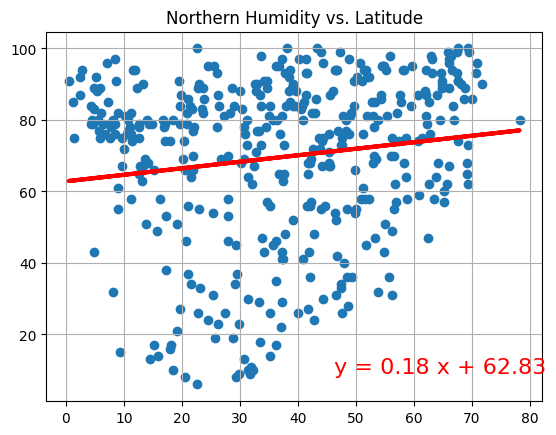

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
lr_plot(x_value , y_value , "Humidity" , (45,9))

plt.title("Northern Humidity vs. Latitude")
#plt.xlabel("Latitude")
#plt.ylabel("Humidity")
#plt.show()

The r-value is: 0.15979285926261377


Text(0.5, 1.0, 'Southern Humidity vs. Latitude')

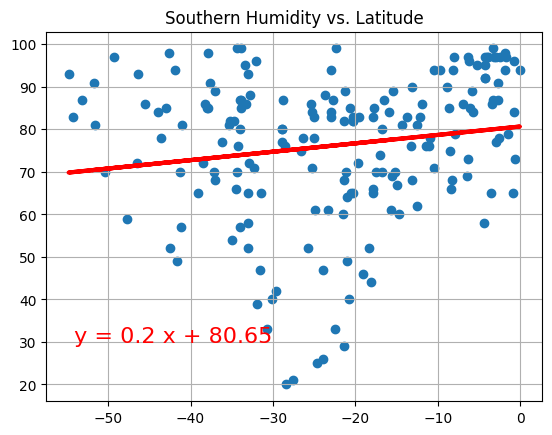

In [63]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
lr_plot(x_value , y_value , "Humidity" , (-55,30))
plt.title("Southern Humidity vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
After carefully examining both charts, it becomes apparent that there's essentially no discernible correlation between humidity and latitude. Regardless of whether we're looking at Northern or Southern latitudes, the linear regression remains slightly flat, indicating a consistent level of humidity across different regions. This consistency is reinforced by the low r-values observed in both charts, suggesting that latitude has little influence on humidity levels. In essence, latitude seems to have minimal impact on humidity, with variations in other factors likely playing a more significant role in determining moisture levels across different latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08559194331456771


Text(0.5, 1.0, 'Northern Cloudiness vs. Latitude')

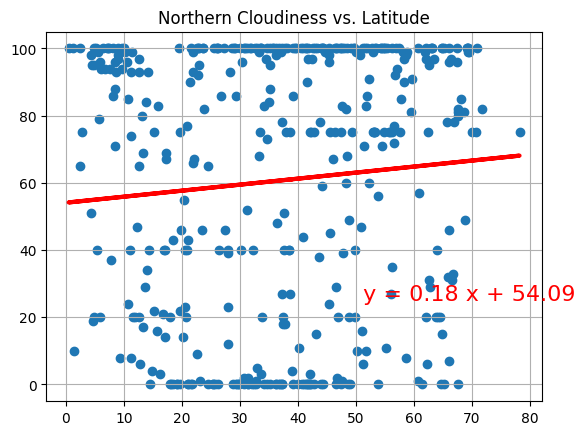

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
lr_plot(x_value , y_value , "Cloudiness" , (50,25))
plt.title("Northern Cloudiness vs. Latitude")

The r-value is: 0.19182488113592097


Text(0.5, 1.0, 'Southern Cloudiness vs. Latitude')

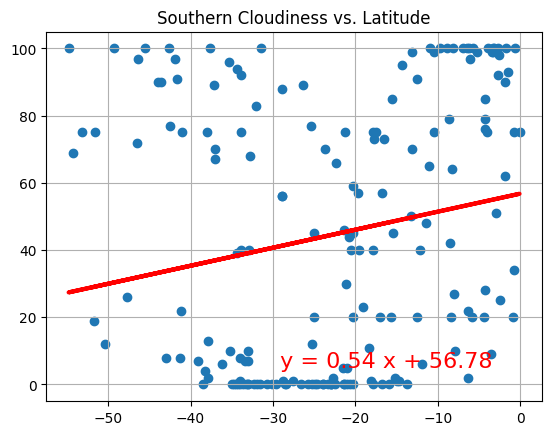

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

lr_plot(x_value , y_value , "Cloudiness" , (-30,5))
plt.title("Southern Cloudiness vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Upon close examination, it becomes evident that there's essentially no discernible relationship between cloud cover and latitude. Regardless of the latitude considered, cloud cover appears to occur across the spectrum, varying from complete absence to full coverage (0 to 100). The flat linear regression line further reinforces this observation, indicating that latitude doesn't significantly influence cloud cover. This conclusion is supported by the r-value, which hovers close to zero, suggesting that changes in latitude have little impact on the occurrence or extent of cloud cover. In essence, cloud cover seems to be influenced by factors other than latitude, with diverse atmospheric dynamics at play across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06979816779866205


Text(0.5, 1.0, 'Northern Wind Speed vs. Latitude')

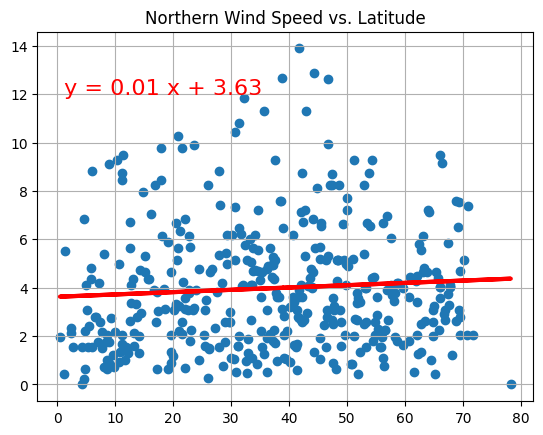

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
lr_plot(x_value , y_value , "Wind Speed" , (0,12))
plt.title("Northern Wind Speed vs. Latitude")

The r-value is: -0.103851289919032


Text(0.5, 1.0, 'Southern Wind Speed vs. Latitude')

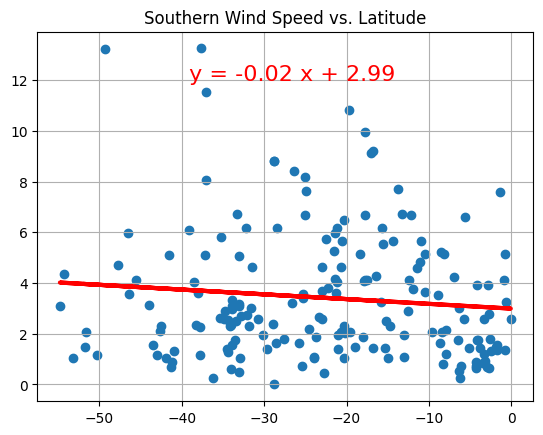

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

lr_plot(x_value , y_value , "Wind sSpeed" , (-40,12))
plt.title("Southern Wind Speed vs. Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Exploring the connection between wind speed and latitude unveils a somewhat intricate scenario, differing between the hemispheres. In the Northern Hemisphere, the linear regression line remains flat, indicating no significant correlation between wind speed and latitude. Conversely, in the Southern Hemisphere, a subtle trend emerges, with wind speed exhibiting a slight decrease as it approaches the equator. 
However, this decline is minimal, typically hovering around 7-8 f/s, and is accompanied by a low r-value, indicating a weak correlation at best. In essence, while there's a nuanced pattern in the Southern Hemisphere, the overall relationship between wind speed and latitude appears to be relatively weak and influenced by various other factors.